# What's for Dinner? Recipe Classification with NLP

 
![](images/header.PNG)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import warnings
warnings.filterwarnings('ignore') # supresses errors


from wordcloud import WordCloud
import ast # used for converting column values to lists post-import from csv

from nltk import FreqDist

pd.set_option("display.max_columns", None)


In [3]:
df = pd.read_csv('data/foodcom_recipes_with_classification.csv')
df.head()

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low..."
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}"
2,41090,black-and-white bean salad,NaN,"['white beans', 'canned black beans', 'tomatoe...","[""1 cup canned white beans, rinsed and dra...",1 (807 g),1,"['In a large bowl, combine beans, tomato, onio...","['15-minutes-or-less', 'time-to-make', 'course...","{'vegetarian', 'salad', 'side', 'dinner', 'veg..."
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}"
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'}


In [4]:
df_inedible = df[df['ingredients'] == "['paper', 'cloth']"]
df_inedible.head()

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms
729,245565,"Serviette/Napkin Folding, Fleur De Lis in a Gl...","Between the teachings of my Grandmother, an Au...","['paper', 'cloth']","[""1 paper, serviette (large)"",""1 ...",1 (0 g),2,['Lay your serviette flat before you in a diam...,"['15-minutes-or-less', 'time-to-make', 'prepar...",{'dinner'}
2674,246865,"Serviette/Napkin Folding, Elegant Basic Roll V...",My interest in serviette folding was born on a...,"['paper', 'cloth']","[""1 paper, serviette (large)"",""1 ...",1 (0 g),2,['Lay your serviette square out flat before yo...,"['15-minutes-or-less', 'time-to-make', 'prepar...",{'dinner'}
4207,249824,"Serviette/Napkin, Elegant Place Mat",My interest in serviette folding was born on a...,"['paper', 'cloth']","[""1 paper, serviette (large)"",""1 ...",1 (0 g),2,['Lay your serviette square out flat before yo...,"['15-minutes-or-less', 'time-to-make', 'prepar...",{'dinner'}
7838,250678,"Serviette/Napkin Folding, Symmetric Delight","Between the teachings of my grandmother, an au...","['paper', 'cloth']","[""1 paper, serviette (large)"",""1 ...",1 (0 g),2,['Lay your serviette square out flat before yo...,"['15-minutes-or-less', 'time-to-make', 'prepar...",{'dinner'}
24305,251628,"Serviette/Napkin, from the Heart","Between the teachings of my Grandmother, an Au...","['paper', 'cloth']","[""1 paper, serviette (large)"",""1 ...",1 (0 g),2,['Lay your serviette out flat before you in a ...,"['15-minutes-or-less', 'time-to-make', 'prepar...",{'dinner'}


In [7]:
# removing napkin folding instructions from the dataframe

df = df[df['ingredients'] != "['paper', 'cloth']"]

In [8]:
# since there are only 20 recipes that do not have their ingredients broken out these will
# be dropped from the dataframe
df = df[df['ingredients'] != "[]"]
df.describe(include = 'object')


,name,description,ingredients,ingredients_raw_str,serving_size,steps,tags,search_terms
count,494880,485282,494880,494880,494880,494880,494880,494880
unique,412722,466871,489862,493851,5301,493091,418244,54344
top,Banana Bread,.,"['eggs', 'water']","[""1 cup water"",""1 cup water""]",1 (134 g),['Blend all ingredients until smooth.'],"['60-minutes-or-less', 'time-to-make', 'prepar...",{'dessert'}
freq,187,439,18,10,1436,32,626,23507


Reading the descriptions of one of the duplicate recipes, a "No-Knead Bread", it looks like at least some of the duplicates come from Food.com users uplaoding recipes from other sources - in this case the New York Times.  

In [9]:
# removing potential duplicate recipes. Code thanks to first answer on 
# https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition
df = df[df.groupby('steps').steps.transform('count')==1].copy() 
# add copy for future warning when you need to modify the sub df
len(df)

491822

In [10]:
def lists_to_count(df, column, series = False):
    ''' takes in a column of lists and returns counts for all unique values. 
    
    Inputs:
    df - dataframe with column being converted
    column - column of lists
    series - if set to True returns pandas Series instead of a FreqDist object 
    
    Returns: 
    Series with unique value counts or FreqDist object, depending on setting of 'series' parameter
    '''

    all_col = df[column].explode()
    col_count = FreqDist(all_col)
    
    if series:
        return pd.Series(dict(col_count))
    else:
        return col_count

### Tag Data Targets

In [11]:

#function for visualizing the most common tokens within a frequency distribution

def visualize_tokens(freq_dist, number, title):
    '''
    From Phase 4 Project: 
    https://github.com/CGPinDC/Tweet_NLP_Project/blob/main/Tweet_Sentiment_%20Analysis_Notebook.ipynb
    
    Inputs:
    freq_dist: pass in frequency dictionary of tokens. 
    number: number as integer of the top tokens to return
    
    title: title of graph
    '''
    

    # get tokens and frequency counts from freq_dist
    top = list(zip(*freq_dist.most_common(number)))
    tokens = top[0]
    counts = top[1]
    
    print(f'Top Tokens: {tokens[:number]}')

    # Set up plot and plot data
    fig, ax = plt.subplots(figsize = (15, 10))
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)

Since there are only 631 distinct tags I could review them one-by-one to select the ones that best fit into the "easy" category.

In [12]:

def return_to_list(df, column_names):
    ''' Takes in list of names of columns containing strings and the dataframe they sit in and returns converts each column's contents into a new
    column, called '<original column name>_list', now as lists. May only work on strings that look like lists.... 
    
    Inputs:
    df = dataframe with columns being converted to lists
    column_names = list of columns whose contents need to be transformed
    
    Returns: updated dataframe
    '''
    for col in column_names:
        col_name = col + '_list'
        df[col_name] = [ast.literal_eval(x) for x in df[col] ]
    
    return df

In [13]:
target_tags = ['easy','30-minutes-or-less', '3-steps-or-less', 
               '15-minutes-or-less', 'beginner-cook']
tags_to_remove = ['bath-beauty', 'household-cleaners', 'homeopathy-remedies']

In [14]:
col_to_list=['tags', 'search_terms']
df = return_to_list(df, col_to_list)

In [15]:
# we'll remove the homeopathic and bath/beauty related recipes by indicating which
# recipes contain the undesirable tags
df['remove'] = df['tags_list'].map(lambda x: any(tag in x for tag in tags_to_remove))
df['remove'].value_counts()

False    491759
True         63
Name: remove, dtype: int64

In [16]:
df = df[df['remove'] != True]
df['remove'].value_counts()

False    491759
Name: remove, dtype: int64

### Search Term Targets

In [17]:
# creating a list with the search term target label
target_search_term = ['dinner']

### Creating Target Variable

In [18]:
# creating a column indicating if a target tag is present in the 'tags_list' column
df['target_tag'] = df['tags_list'].map(lambda x: any(tag in x for tag in target_tags))
df['target_tag'].value_counts(normalize=True)

True     0.655059
False    0.344941
Name: target_tag, dtype: float64

In [17]:
df.head()

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,tags_list,search_terms_list,remove,target_tag
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low...","[time-to-make, course, main-ingredient, prepar...","{vegetarian, side, diabetic, low-calorie, low-...",False,False
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}","[60-minutes-or-less, time-to-make, course, mai...","{shrimp, dinner}",False,True
2,41090,black-and-white bean salad,NaN,"['white beans', 'canned black beans', 'tomatoe...","[""1 cup canned white beans, rinsed and dra...",1 (807 g),1,"['In a large bowl, combine beans, tomato, onio...","['15-minutes-or-less', 'time-to-make', 'course...","{'vegetarian', 'salad', 'side', 'dinner', 'veg...","[15-minutes-or-less, time-to-make, course, mai...","{vegetarian, salad, dinner, side, vegan}",False,True
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}","[weeknight, time-to-make, course, main-ingredi...","{italian, vegetarian, side}",False,True
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'},"[time-to-make, course, main-ingredient, prepar...",{dinner},False,True


In [19]:
# small function to relabled the 'target_tag' value for recipes with '60-minutes-or-less' 
# tags
def hour_check(x):
    if '60-minutes-or-less' in x: 
        return False
    else:
        return True

In [20]:
# credit to first response on https://stackoverflow.com/questions/58562662/apply-function-on-subset-of-dataframe-rows-in-column-based-on-value-in-other-col
# for helping me figure out how to re-label the 'target_tag' column
df['target_tag'] = df.apply(lambda row:
    hour_check(row.tags_list) if row.target_tag == True else row.target_tag, axis=1)

In [21]:
# identifying the recipes with the target search term
df['target_search_term'] = df['search_terms_list'].map(lambda x: any(term in x for term in target_search_term))
df['target_search_term'].value_counts(normalize=True)

False    0.562975
True     0.437025
Name: target_search_term, dtype: float64

Once the recipes were labeled with the target conditions the below code identifies recipes that meet both the search term condition and the tag condition.

In [22]:
def target_check(x):
    ''' dataframe specific function to set rows as meeting the conditions for the 
    target variable or not'''
    if (x['target_tag'] == True) and (x['target_search_term'] == True):
        return 1
    else:
        return 0

In [23]:
df['target'] = df.apply(target_check, axis=1)
df.head()

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,tags_list,search_terms_list,remove,target_tag,target_search_term,target
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low...","[time-to-make, course, main-ingredient, prepar...","{low-carb, diabetic, side, vegetarian, low-cal...",False,False,False,0
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}","[60-minutes-or-less, time-to-make, course, mai...","{shrimp, dinner}",False,False,True,0
2,41090,black-and-white bean salad,NaN,"['white beans', 'canned black beans', 'tomatoe...","[""1 cup canned white beans, rinsed and dra...",1 (807 g),1,"['In a large bowl, combine beans, tomato, onio...","['15-minutes-or-less', 'time-to-make', 'course...","{'vegetarian', 'salad', 'side', 'dinner', 'veg...","[15-minutes-or-less, time-to-make, course, mai...","{salad, side, vegetarian, vegan, dinner}",False,True,True,1
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}","[weeknight, time-to-make, course, main-ingredi...","{side, vegetarian, italian}",False,True,False,0
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'},"[time-to-make, course, main-ingredient, prepar...",{dinner},False,True,True,1


In [24]:
# final clean-up action (for now) 
df.drop(['remove'], axis=1, inplace = True)

In [25]:
import seaborn as sns

In [26]:
import re


In [27]:
def basic_cleaning(df, column):
    ''' Takes in a dataframe and the name of the column to be cleaned.  The contents of the column 
    which need to be strings, are converted to lowercase, have their punctuation and numbers removed,
    and are finally stripped of whitespaces
    
    Input:
    df - dataframe with column to be cleaned
    column - column containing strings
    
    Returns: 
    Dataframe with new, cleaned, column added'''
    new_col = 'cleaned_' +column
    # convert to lowercase
    df[new_col] = df[column].apply(lambda x: x.lower())
    
    # remove punctuation and non-characters
    df[new_col] = df[new_col].apply(lambda x: re.sub(r'[^\w\s]','',x))
    df[new_col] = df[new_col].apply(lambda x: re.sub('[0-9\n]',' ',x))

    #strip whitespace
    df[new_col] = df[new_col].apply(lambda x: re.sub('[ ]{2,}',' ',x))
    
    return df

In [28]:
# cleaning steps column 
df = basic_cleaning(df, 'steps')

In [29]:
# tokenizing steps
df['step_tokens'] = df['cleaned_steps'].apply(lambda x: x.split())
df.head()

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,tags_list,search_terms_list,target_tag,target_search_term,target,cleaned_steps,step_tokens
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low...","[time-to-make, course, main-ingredient, prepar...","{low-carb, diabetic, side, vegetarian, low-cal...",False,False,0,i a sauce pan bring water to a boil slowly add...,"[i, a, sauce, pan, bring, water, to, a, boil, ..."
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}","[60-minutes-or-less, time-to-make, course, mai...","{shrimp, dinner}",False,True,0,in a food processor pulse the onion red pepper...,"[in, a, food, processor, pulse, the, onion, re..."
2,41090,black-and-white bean salad,NaN,"['white beans', 'canned black beans', 'tomatoe...","[""1 cup canned white beans, rinsed and dra...",1 (807 g),1,"['In a large bowl, combine beans, tomato, onio...","['15-minutes-or-less', 'time-to-make', 'course...","{'vegetarian', 'salad', 'side', 'dinner', 'veg...","[15-minutes-or-less, time-to-make, course, mai...","{salad, side, vegetarian, vegan, dinner}",True,True,1,in a large bowl combine beans tomato onion and...,"[in, a, large, bowl, combine, beans, tomato, o..."
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}","[weeknight, time-to-make, course, main-ingredi...","{side, vegetarian, italian}",True,False,0,put all ingredients in the crock pot and cook ...,"[put, all, ingredients, in, the, crock, pot, a..."
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'},"[time-to-make, course, main-ingredient, prepar...",{dinner},True,True,1,preheat oven to f cut beef into inch cubes com...,"[preheat, oven, to, f, cut, beef, into, inch, ..."


In [30]:
# geting word counts
token_count = lists_to_count(df, 'step_tokens', series = True).sort_values(ascending=False)

In [31]:
from nltk.corpus import stopwords

In [32]:
# creating a list of the nltk's English-language stopwords
stop_words = stopwords.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [33]:
# a small function to quickly remove stopwords from the 'step_tokens' column 
def remove_stop_words(count, stop_words):
    for x in count.index:
        if x in stop_words:
            count = count.drop(x)
    
    return count

In [34]:
token_count = remove_stop_words(token_count, stop_words)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491759 entries, 0 to 494962
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   491759 non-null  int64 
 1   name                 491759 non-null  object
 2   description          482239 non-null  object
 3   ingredients          491759 non-null  object
 4   ingredients_raw_str  491759 non-null  object
 5   serving_size         491759 non-null  object
 6   servings             491759 non-null  int64 
 7   steps                491759 non-null  object
 8   tags                 491759 non-null  object
 9   search_terms         491759 non-null  object
 10  tags_list            491759 non-null  object
 11  search_terms_list    491759 non-null  object
 12  target_tag           491759 non-null  bool  
 13  target_search_term   491759 non-null  bool  
 14  target               491759 non-null  int64 
 15  cleaned_steps        491759 non-nu

In [36]:


df.description = df.description.astype(str)

In [37]:
# cleaning and tokenizing 'description'
df = basic_cleaning(df, 'description')
df['description_tokens'] = df['cleaned_description'].apply(lambda x: x.split())
df.head()

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,tags_list,search_terms_list,target_tag,target_search_term,target,cleaned_steps,step_tokens,cleaned_description,description_tokens
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low...","[time-to-make, course, main-ingredient, prepar...","{low-carb, diabetic, side, vegetarian, low-cal...",False,False,0,i a sauce pan bring water to a boil slowly add...,"[i, a, sauce, pan, bring, water, to, a, boil, ...",we love grits this is another good way to serv...,"[we, love, grits, this, is, another, good, way..."
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}","[60-minutes-or-less, time-to-make, course, mai...","{shrimp, dinner}",False,True,0,in a food processor pulse the onion red pepper...,"[in, a, food, processor, pulse, the, onion, re...",simple easy and very tasty for when you are in...,"[simple, easy, and, very, tasty, for, when, yo..."
2,41090,black-and-white bean salad,nan,"['white beans', 'canned black beans', 'tomatoe...","[""1 cup canned white beans, rinsed and dra...",1 (807 g),1,"['In a large bowl, combine beans, tomato, onio...","['15-minutes-or-less', 'time-to-make', 'course...","{'vegetarian', 'salad', 'side', 'dinner', 'veg...","[15-minutes-or-less, time-to-make, course, mai...","{salad, side, vegetarian, vegan, dinner}",True,True,1,in a large bowl combine beans tomato onion and...,"[in, a, large, bowl, combine, beans, tomato, o...",nan,[nan]
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}","[weeknight, time-to-make, course, main-ingredi...","{side, vegetarian, italian}",True,False,0,put all ingredients in the crock pot and cook ...,"[put, all, ingredients, in, the, crock, pot, a...",this is a good recipe for weight watchers it i...,"[this, is, a, good, recipe, for, weight, watch..."
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'},"[time-to-make, course, main-ingredient, prepar...",{dinner},True,True,1,preheat oven to f cut beef into inch cubes com...,"[preheat, oven, to, f, cut, beef, into, inch, ...",this is a fabulous stew that came from one of ...,"[this, is, a, fabulous, stew, that, came, from..."


In [38]:
# getting word count
description_count = lists_to_count(df, 'description_tokens', series = True).sort_values(ascending=False)

In [39]:
# remove stopwords from 'description_count'
description_count = remove_stop_words(description_count, stop_words)


## Baseline Model

This model uses the length data generated earlier to ensure that NLP is an appropriate approach for predicting the difficulty level of a recipe. To begin with we'll create a dataframe that only uses the 'num' columns in the current dataframe.

In [40]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from imblearn.under_sampling import RandomUnderSampler


In [41]:
def evaluate(estimator, X_tr, X_te, y_tr, y_te, cv=5):
    '''
Function takes in estimator, training data, test data, 
and the cross validation splitting strategy, and returns the accuracy, precision, recall, f1 and the ROC-AUC
scores for the model as well as a confusion matrix visualization.  From Phase 3 Project: 
https://github.com/Nindorph/TanzanianWaterWells/blob/main/Modeling_Final.ipynb and Lindsey Berlin’s evaluate function
found at: 
https://github.com/lindseyberlin/Cat-in-the-Dat-Project/blob/main/notebooks/Lindsey/EDA-Initial-Models.ipynb
------------------------------------------------------------------------------------------
Inputs: 
-Estimator - Estimator object  
-X_tr – X_train dataframe
-X_te – X_test dataframe
-Y_tr – y_train dataframe
-Y_te – y_test dataframe
-Cv – If cross_val  set to true this determines the cross-validation splitting strategy.  
        Takes in all value options for sklearn.model_selection_cross_val_score “cv” parameter:
        - None, to use the default 5-fold cross validation,
        - int, to specify the number of folds in a (Stratified)KFold,
        - CV splitter,
        - An iterable yielding (train, test) splits as arrays of indices


Returns – nothing is returned 


    '''
    #If no grid search is being performed, go through evaluation steps as normal, including cross validation
    #Cross-Validate
    output = cross_validate(estimator, X_tr, y_tr, cv=cv,
                            scoring=['accuracy', 'precision','recall', 'f1', 'roc_auc'])
    #Printing out the mean of all of our evaluating metrics across the cross validation. 
    #Accuracy, precisionc recall, f1, and roc auc
    print('Results of Cross-Validation:\n')
    print(f'Average accuracy: {output["test_accuracy"].mean()}\
    +/- {output["test_accuracy"].std()}')
    print(f'Average precision: {output["test_precision"].mean()}\
    +/- {output["test_precision"].std()}')
    print(f'**Average recall: {output["test_recall"].mean()}\
    +/- {output["test_recall"].std()}')
    print(f'Average f1 score: {output["test_f1"].mean()}\
    +/- {output["test_f1"].std()}')
    print(f'Average roc_auc: {output["test_roc_auc"].mean()}\
    +/- {output["test_roc_auc"].std()}\n')
    print('+'*20)
    
        
    #Fitting the estimator to our X and y train data
    estimator.fit(X_tr, y_tr)
    #getting predictions for X train
    tr_preds = estimator.predict(X_tr)
    #getting predictions for X test
    te_preds = estimator.predict(X_te)
        
    #Creating a confusion matrix from our data with custom labels
    print('\nResults of Train-Test Split Validation:')
    plot_confusion_matrix(estimator, X_te, y_te, cmap='mako')
    plt.show()
        
    #Printing our final evaluating metrics across X train
    #Evaluating using accuracy, precision, recall, f1, roc auc
    print("\nTraining Scores:")
    print(f"Train accuracy: {accuracy_score(y_tr, tr_preds)}")
    print(f"Train precision: {precision_score(y_tr, tr_preds)}")
    print(f"**Train recall: {recall_score(y_tr, tr_preds)}")
    print(f"Train f1 score: {f1_score(y_tr, tr_preds)}")
    print(f"Train roc_auc: {roc_auc_score(y_tr, tr_preds)}\n")
    print("<>"*10)
    #Printing our final evaluating metrics across X test
    #Evaluating using accuracy, precision, recall, f1, roc auc
    print("\nTesting Scores:")
    print(f"Test accuracy: {accuracy_score(y_te, te_preds)}")
    print(f"Test precision: {precision_score(y_te, te_preds)}")
    print(f"**Test recall: {recall_score(y_te, te_preds)}")
    print(f"Test f1 score: {f1_score(y_te, te_preds)}")
    print(f"Test roc_auc: {roc_auc_score(y_te, te_preds)}")


In [42]:
# creating a dataframe with the text that will be used in the model as well as the target
df_strings = df[['ingredients','description','steps','target']]
df_strings.head()

,ingredients,description,steps,target
0,"['water', 'grits', 'salt', 'cheddar cheese', '...","We love grits, this is another good way to ser...","['I a sauce pan, bring water to a boil; slowly...",0
1,"['onion', 'red bell pepper', 'garlic cloves', ...","Simple, easy and very tasty for when you are i...","['In a food processor, pulse the onion, red pe...",0
2,"['white beans', 'canned black beans', 'tomatoe...",nan,"['In a large bowl, combine beans, tomato, onio...",1
3,"['zucchini', 'yellow squash', 'diced tomatoes'...",This is a good recipe for weight watchers. It ...,['Put all ingredients in the crock pot and coo...,0
4,"['beef stew meat', 'flour', 'salt', 'allspice'...",This is a fabulous stew that came from one of ...,"['Preheat oven to 350°F.', ""Cut beef into 1 in...",1


In [43]:
# use the basic_cleaning function on each non-list column of the dataframe 
df_strings = basic_cleaning(df_strings, 'description')
df_strings = basic_cleaning(df_strings, 'steps')
df_strings = basic_cleaning(df_strings, 'ingredients')

In [44]:
# dropping unnecessary columns
df_strings.drop(columns = ['ingredients','description','steps'], inplace=True)
df_strings

,target,cleaned_description,cleaned_steps,cleaned_ingredients
0,0,we love grits this is another good way to serv...,i a sauce pan bring water to a boil slowly add...,water grits salt cheddar cheese garlic olive oil
1,0,simple easy and very tasty for when you are in...,in a food processor pulse the onion red pepper...,onion red bell pepper garlic cloves large shri...
2,1,nan,in a large bowl combine beans tomato onion and...,white beans canned black beans tomatoes onion ...
3,0,this is a good recipe for weight watchers it i...,put all ingredients in the crock pot and cook ...,zucchini yellow squash diced tomatoes onion ga...
4,1,this is a fabulous stew that came from one of ...,preheat oven to f cut beef into inch cubes com...,beef stew meat flour salt allspice cinnamon bl...
...,...,...,...,...
494958,0,the orange zest makes for a flavorful not over...,sift about cups of flour onto a piece of waxed...,unbleached flour baking soda butter orange zes...
494959,1,delicious and easy,place rosemary springs lemon half celery onion...,roasting chickens lemons rosemary sprigs papri...
494960,0,this is a recipe from the frugal gourmet cooki...,in a large pan heat oil and brown roast on bot...,boneless beef chuck roast olive oil tawny port...
494961,1,cabbage and sausage in tomato sauce,saute bacon in large pan until browned leave i...,cabbage condensed tomato soup kielbasa onions ...


In [45]:
# splitting the data to X and y 
y = df_strings['target']
X = df_strings.drop('target', axis=1)

In [46]:
# undersampling the data in the same manner used with the baseline model
rus = RandomUnderSampler(random_state=50)
X_res, y_res = rus.fit_resample(X, y)
y_res.value_counts()

1    100060
0    100060
Name: target, dtype: int64

In [47]:
# splitting the data, including creating a holdout set
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = .3, 
                                                    random_state=50)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .3,
                                                        random_state=50)

In [48]:
# creating a new column compatible with vectorizer inputs 
X_train['combined'] = X_train['cleaned_description'].str.cat(X_train[['cleaned_steps',
                                                                      'cleaned_ingredients']],sep=" ")

X_train.head()

,cleaned_description,cleaned_steps,cleaned_ingredients,combined
44085,kids love this its absolutely yummy,whisk eggs in bowl until blended add milk whis...,white bread milk eggs crunchy peanut butter jelly,kids love this its absolutely yummy whisk eggs...
88070,this hearty soup has lots of possible variations,soak cannellini beans in quarts of water with ...,dried cannellini beans onions celery carrot ol...,this hearty soup has lots of possible variatio...
23043,i love lentils for their versatility found thi...,preheat oven to f combine water lentils and te...,water dried brown lentils salt onion ketchup m...,i love lentils for their versatility found thi...
66923,for a luxurious vegetable sidedish try this ri...,preheat the oven to f bring a large pan of wat...,spinach milk butter flour nutmeg salt freshly ...,for a luxurious vegetable sidedish try this ri...
2931,nan,preheat the oven to cream the butter and sugar...,butter granulated sugar egg lavender flowers f...,nan preheat the oven to cream the butter and s...


In [49]:
# repeating this with the test data
X_test['combined'] = X_test['cleaned_description'].str.cat(X_test[['cleaned_steps',
                                                                'cleaned_ingredients']],sep=" ")
X_test.head()

,cleaned_description,cleaned_steps,cleaned_ingredients,combined
89380,when the corn crop is good i make sure to can ...,cut fresh corn of the cob combine in a big sto...,fresh corn water salt sugar,when the corn crop is good i make sure to can ...
13662,this is an old recipe it is extremely moist be...,peel the potatoes cover with water and boil un...,potatoes allpurpose flour ground ginger baking...,this is an old recipe it is extremely moist be...
49940,this is a very easy dish to prepare suitable f...,mix together sauce ingredients in a saucepan h...,beef flank steak onion chicken broth green bel...,this is a very easy dish to prepare suitable f...
162373,i noticed that there was almost nothing that h...,mix egg amp milk well if you are using herbs p...,popped corn egg substitute milk salt pepper fi...,i noticed that there was almost nothing that h...
90724,made with an oliveoil crust and a drizzle of h...,to make the tart dough using a pastry blendero...,flour unsalted butter salt fresh coarse ground...,made with an oliveoil crust and a drizzle of h...


## Modeling  

To begin the modeling process basic, nlp appropriate,  models are created and run with both types of vectorized datasets.  This will identify which models deserve more attention and fine tuning. The iterative evaluation code has been removed from this section and only the highest performing models will be evaluated.  To see the full evaluation code please see the 'recipe-classification-with-nlp-v2.ipynb' file in the archive folder.

In [50]:
from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


### CountVectorizer

In [50]:
# having the CountVectorizer remove stop words and create bigrams, and sets max_df to .95 as that was the setting on all 
# top performing models

countvect = CountVectorizer(stop_words=stop_words, ngram_range=(1,2))

In [51]:
X_train_CV_bi = countvect.fit_transform(X_train.combined)
X_test_CV_bi = countvect.transform(X_test.combined)

In [53]:
# will not be running this list through basic evaluation but retaining it to show what models were tested
classifiers = {
    "BernoulliNB": BernoulliNB(),
     "ComplementNB": ComplementNB(),
     "MultinomialNB": MultinomialNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=3), #to keep the initial modeling quick
    "RandomForestClassifier": RandomForestClassifier(max_depth=3),
    # parameters in below LogisticRegression model determined by sklearn documentation on appropriate solvers for large
    # datasets
    "LogisticRegression": LogisticRegression(penalty = 'elasticnet',l1_ratio =.5, solver='saga'), 
    "AdaBoostClassifier": AdaBoostClassifier(),
}

In [54]:
# code found on https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Hello World !' + color.END)

Hello World !


In [55]:
for name, sklearn_classifier in classifiers.items():
    classifier = sklearn_classifier
    print('')

    evaluate(classifier, X_train_CV_bi, X_test_CV_bi, y_train, y_test)

NameError: name 'X_train_CV_bi' is not defined

### TfidfVectorizer

In [56]:
tfidf = TfidfVectorizer(stop_words = stop_words, ngram_range = (1,2))
X_train_tfidf_bi = tfidf.fit_transform(X_train.combined)
X_test_tfidf_bi = tfidf.transform(X_test.combined)


 BernoulliNB
Results of Cross-Validation:

Average accuracy: 0.6754375678167333    +/- 0.0034792410126716976
Average precision: 0.6296179102308896    +/- 0.003267266307383052
**Average recall: 0.851848692998512    +/- 0.0009246778889362497
Average f1 score: 0.7240600070960085    +/- 0.002147284661311645
Average roc_auc: 0.7497201764776135    +/- 0.0026858022021443873

++++++++++++++++++++

Results of Train-Test Split Validation:


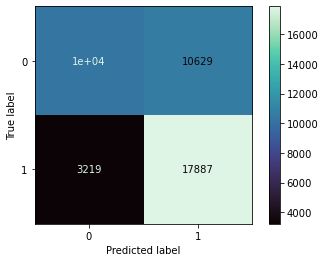


Training Scores:
Train accuracy: 0.7768267610862054
Train precision: 0.7180615253054887
**Train recall: 0.9113719777787298
Train f1 score: 0.8032499040258785
Train roc_auc: 0.7768632487058106

<><><><><><><><><><>

Testing Scores:
Test accuracy: 0.6704818560380725
Test precision: 0.6272618880628419
**Test recall: 0.8474841277361888
Test f1 score: 0.7209302325581396
Test roc_auc: 0.6696907229818188

 ComplementNB
Results of Cross-Validation:

Average accuracy: 0.6857456842664689    +/- 0.002475164833981803
Average precision: 0.650647518859528    +/- 0.002731593992343669
**Average recall: 0.801922246726875    +/- 0.0015386645536107201
Average f1 score: 0.7184030435856934    +/- 0.001564915687084363
Average roc_auc: 0.7570260885879111    +/- 0.002452489346383203

++++++++++++++++++++

Results of Train-Test Split Validation:


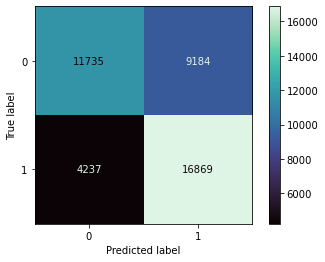


Training Scores:
Train accuracy: 0.752555609491448
Train precision: 0.7096575277487904
**Train recall: 0.854633477571655
Train f1 score: 0.775427434872466
Train roc_auc: 0.7525832922178367

<><><><><><><><><><>

Testing Scores:
Test accuracy: 0.6806424747174301
Test precision: 0.6474878133036502
**Test recall: 0.7992513977068132
Test f1 score: 0.7154095718738736
Test roc_auc: 0.6801123377940825

 MultinomialNB
Results of Cross-Validation:

Average accuracy: 0.6857456840116674    +/- 0.0024988631152949286
Average precision: 0.6506721111564542    +/- 0.0027539071753587105
**Average recall: 0.8018222803889051    +/- 0.0015435855142660613
Average f1 score: 0.7183778778829175    +/- 0.0015838792766220248
Average roc_auc: 0.7570260885879111    +/- 0.002452489346383203

++++++++++++++++++++

Results of Train-Test Split Validation:


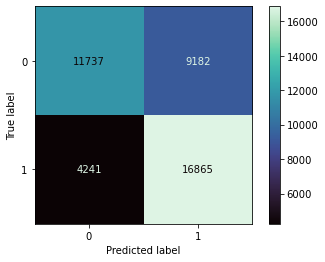


Training Scores:
Train accuracy: 0.7526127180834357
Train precision: 0.7097397822425694
**Train recall: 0.8545906345058052
Train f1 score: 0.7754588983847036
Train roc_auc: 0.7526403737037097

<><><><><><><><><><>

Testing Scores:
Test accuracy: 0.6805948839976205
Test precision: 0.6474833954006219
**Test recall: 0.7990618781389178
Test f1 score: 0.7153309439484231
Test roc_auc: 0.6800653814424213

 DecisionTreeClassifier
Results of Cross-Validation:

Average accuracy: 0.6308857356878881    +/- 0.002195910155738289
Average precision: 0.6145905030206507    +/- 0.010839360614153488
**Average recall: 0.7066832396843621    +/- 0.05466990666598507
Average f1 score: 0.656027175612998    +/- 0.015551057571166413
Average roc_auc: 0.6652058778158365    +/- 0.0019034869618739716

++++++++++++++++++++

Results of Train-Test Split Validation:


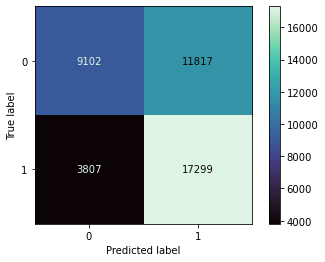


Training Scores:
Train accuracy: 0.6321278661374604
Train precision: 0.5954036985057376
**Train recall: 0.8239721234451537
Train f1 score: 0.6912842140576418
Train roc_auc: 0.6321798928126269

<><><><><><><><><><>

Testing Scores:
Test accuracy: 0.6282212968471148
Test precision: 0.5941406786646517
**Test recall: 0.8196247512555671
Test f1 score: 0.6889012783242404
Test roc_auc: 0.6273657959633637

 RandomForestClassifier
Results of Cross-Validation:

Average accuracy: 0.6429142323681386    +/- 0.006422786276644234
Average precision: 0.6087032363623797    +/- 0.004002196450069507
**Average recall: 0.799579978220126    +/- 0.01467965696641312
Average f1 score: 0.6911699546070013    +/- 0.007530978111465752
Average roc_auc: 0.7027562425643419    +/- 0.006249830877756449

++++++++++++++++++++

Results of Train-Test Split Validation:


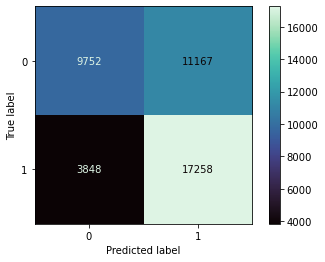


Training Scores:
Train accuracy: 0.6476828188801005
Train precision: 0.6107390461086764
**Train recall: 0.8139611270582523
Train f1 score: 0.6978560846301716
Train roc_auc: 0.6477279122680821

<><><><><><><><><><>

Testing Scores:
Test accuracy: 0.6427126710291493
Test precision: 0.607141600703606
**Test recall: 0.8176821756846394
Test f1 score: 0.6968565141022793
Test roc_auc: 0.6419306236709922

 LogisticRegression
Results of Cross-Validation:

Average accuracy: 0.7154207536086998    +/- 0.0018557719828075406
Average precision: 0.7027594929391106    +/- 0.0027607824014668158
**Average recall: 0.7464118957800705    +/- 0.0012473515637255509
Average f1 score: 0.7239233398799343    +/- 0.0011527891637568108
Average roc_auc: 0.7900018056666543    +/- 0.002996694834424477

++++++++++++++++++++

Results of Train-Test Split Validation:


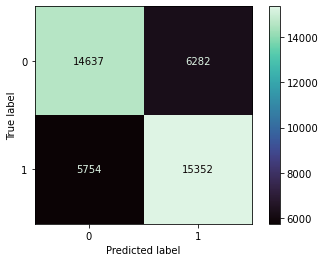


Training Scores:
Train accuracy: 0.7420476285657177
Train precision: 0.7285282693137678
**Train recall: 0.7714036816474586
Train f1 score: 0.7493531806862874
Train roc_auc: 0.7420555896997089

<><><><><><><><><><>

Testing Scores:
Test accuracy: 0.7135990481856038
Test precision: 0.7096237404086161
**Test recall: 0.7273761015824884
Test f1 score: 0.7183902667290595
Test roc_auc: 0.7135374699795419

 AdaBoostClassifier


In [ ]:
for name, sklearn_classifier in classifiers.items():
    classifier = sklearn_classifier
    print("")
    print(color.BOLD + ' ' + name + color.END)
    evaluate(classifier, X_train_tfidf_bi, X_test_tfidf_bi, y_train, y_test)